<a href="https://colab.research.google.com/github/zorrento/Sberseasons_task_default_probability_prediction/blob/main/Colab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Задание:</b> Необходимо разработать модель предсказания дефолта. Даны финансовые данные 32 395 компаний (выручка, активы, пассивы и т.д). Результат будет оцениваться на скрытой выборке из 200 компаний по метрике качества accuracy_score

<b>Цель задания</b> научиться / показать знания в разработке моделей оценки риска - probability of default. Задание приближено к реальному, данные синтетические. Лидерборд для оценки собственного решения и геймификации процесса обучения. Первое место в лидерборде не явлется целью. Цель - правильно разарботанная модель, удовлетворяющая требованиям банковской системы. В случае возникновения вопросов, сотрудники блока Риски готовы проконсультировать и дать обратную связь на модель (телеграм чат).

<b>Метрика качества</b> accuracy_score вычисляется, как ( True positive + True negative ) / Total. Если сабмит-файл, не правильного формата или неверное количество строк, метрика будет = 0.

Импортируем библиотеки

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

Загружаем данные

In [ ]:
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-desc.csv

--2022-05-06 20:50:57--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5329268 (5.1M) [text/plain]
Saving to: ‘PD-data-train.csv.5’

PD-data-train.csv.5 100%[===================>]   5.08M  --.-KB/s    in 0.08s   

2022-05-06 20:50:58 (65.2 MB/s) - ‘PD-data-train.csv.5’ saved [5329268/5329268]

--2022-05-06 20:50:58--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28259

In [ ]:
train_df = pd.read_csv('PD-data-train.csv', sep=';')
test_df = pd.read_csv('PD-data-test.csv', sep=';')
desc_df = pd.read_csv('PD-data-desc.csv', sep=';')

Описание данных (ru only)

In [ ]:
desc_df.drop('desc_eng', axis=1).head(35)

,field,desc_rus
0,ar_revenue,Выручка от реализации (на конец последнего года)
1,ar_total_expenses,Общие расходы за последний год
2,ar_sale_cost,Себестоимость продаж (на конец последнего года)
3,ar_selling_expenses,Коммерческие расходы (на конец последнего года)
4,ar_management_expenses,Управленческие расходы (на конец последнего года)
5,ar_sale_profit,Прибыль от реализации (на конец последнего года)
6,ar_balance_of_rvns_and_expns,Баланс доходов и расходов (на конец последнего...
7,ar_profit_before_tax,Валовая прибыль (на конец последнего года)
8,ar_taxes,Текущий на налог на прибыль (на конец последне...
9,ar_other_profit_and_losses,Прочие доходы и расходы (на конец последнего г...


Размерность датасетов

In [ ]:
train_df.shape

(32395, 37)

In [ ]:
test_df.shape

(200, 36)

Количество разных типов фичей

In [ ]:
train_df.dtypes.value_counts()

float64    25
int64      11
object      1
dtype: int64

In [ ]:
train_df['default_12m'].values.mean()

0.06454699799351751

Уровень дефолт-рейта в выборке = 6,454%

Посмотрим на данные подробнее


In [ ]:
train_df.count()

record_id                       32395
ar_revenue                      17250
ar_total_expenses               17250
ar_sale_cost                    17250
ar_selling_expenses             17250
ar_management_expenses          17250
ar_sale_profit                  17250
ar_balance_of_rvns_and_expns    17250
ar_profit_before_tax            17250
ar_taxes                        17250
ar_other_profit_and_losses      17250
ar_net_profit                   17250
ab_immobilized_assets           17250
ab_mobile_current_assets        17250
ab_inventory                    17250
ab_accounts_receivable          17250
ab_other_current_assets         17250
ab_cash_and_securities          17250
ab_losses                       17250
ab_own_capital                  17250
ab_borrowed_capital             17250
ab_long_term_liabilities        17250
ab_short_term_borrowing         17250
ab_accounts_payable             17250
ab_other_borrowings             17250
bus_age                         32395
ogrn_age    

In [ ]:
train_df[train_df['ar_revenue'].isnull()].count()#видим, что данные отсутствуют в одних и тех же наблюдениях

record_id                       15145
ar_revenue                          0
ar_total_expenses                   0
ar_sale_cost                        0
ar_selling_expenses                 0
ar_management_expenses              0
ar_sale_profit                      0
ar_balance_of_rvns_and_expns        0
ar_profit_before_tax                0
ar_taxes                            0
ar_other_profit_and_losses          0
ar_net_profit                       0
ab_immobilized_assets               0
ab_mobile_current_assets            0
ab_inventory                        0
ab_accounts_receivable              0
ab_other_current_assets             0
ab_cash_and_securities              0
ab_losses                           0
ab_own_capital                      0
ab_borrowed_capital                 0
ab_long_term_liabilities            0
ab_short_term_borrowing             0
ab_accounts_payable                 0
ab_other_borrowings                 0
bus_age                         15145
ogrn_age    

In [ ]:
test_df.count()

record_id                       200
ar_revenue                       82
ar_total_expenses                82
ar_sale_cost                     82
ar_selling_expenses              82
ar_management_expenses           82
ar_sale_profit                   82
ar_balance_of_rvns_and_expns     82
ar_profit_before_tax             82
ar_taxes                         82
ar_other_profit_and_losses       82
ar_net_profit                    82
ab_immobilized_assets            82
ab_mobile_current_assets         82
ab_inventory                     82
ab_accounts_receivable           82
ab_other_current_assets          82
ab_cash_and_securities           82
ab_losses                        82
ab_own_capital                   82
ab_borrowed_capital              82
ab_long_term_liabilities         82
ab_short_term_borrowing          82
ab_accounts_payable              82
ab_other_borrowings              82
bus_age                         200
ogrn_age                        200
adr_actual_age              

In [ ]:
test_df[test_df['ar_revenue'].isnull()].count()#видим, что данные отсутствуют в одних и тех же наблюдениях

record_id                       118
ar_revenue                        0
ar_total_expenses                 0
ar_sale_cost                      0
ar_selling_expenses               0
ar_management_expenses            0
ar_sale_profit                    0
ar_balance_of_rvns_and_expns      0
ar_profit_before_tax              0
ar_taxes                          0
ar_other_profit_and_losses        0
ar_net_profit                     0
ab_immobilized_assets             0
ab_mobile_current_assets          0
ab_inventory                      0
ab_accounts_receivable            0
ab_other_current_assets           0
ab_cash_and_securities            0
ab_losses                         0
ab_own_capital                    0
ab_borrowed_capital               0
ab_long_term_liabilities          0
ab_short_term_borrowing           0
ab_accounts_payable               0
ab_other_borrowings               0
bus_age                         118
ogrn_age                        118
adr_actual_age              

Как видим, в тренировочной и тестовой выборке есть значительное число наблюдений, по которым нет информации по фичам [ar_revenue, ..., ab_other_borrowings]. Так как эти данные связаны с последним годом, можно предположить, что их у компаний нет\получить их не можем. Поэтому необходимо построить две независимые модели: для данных с имеющейся информацией по фичам [ar_revenue, ..., ab_other_borrowings] и для данных без такой информации.

Посмотрим далее, можно ли удалить какие-либо из признаков

In [ ]:
train_df.nunique()

record_id                       32395
ar_revenue                      12893
ar_total_expenses               12779
ar_sale_cost                    12664
ar_selling_expenses              1994
ar_management_expenses           1093
ar_sale_profit                   7163
ar_balance_of_rvns_and_expns     5063
ar_profit_before_tax             6526
ar_taxes                         2247
ar_other_profit_and_losses        595
ar_net_profit                    6231
ab_immobilized_assets            3498
ab_mobile_current_assets        11222
ab_inventory                     9143
ab_accounts_receivable           8283
ab_other_current_assets          1210
ab_cash_and_securities           3677
ab_losses                        6175
ab_own_capital                   9090
ab_borrowed_capital             10261
ab_long_term_liabilities         2294
ab_short_term_borrowing          4896
ab_accounts_payable              8797
ab_other_borrowings              1437
bus_age                           315
ogrn_age    

In [ ]:
test_df.nunique()

record_id                       200
ar_revenue                       76
ar_total_expenses                77
ar_sale_cost                     77
ar_selling_expenses              13
ar_management_expenses            4
ar_sale_profit                   77
ar_balance_of_rvns_and_expns     67
ar_profit_before_tax             79
ar_taxes                         52
ar_other_profit_and_losses        8
ar_net_profit                    77
ab_immobilized_assets            19
ab_mobile_current_assets         79
ab_inventory                     74
ab_accounts_receivable           72
ab_other_current_assets           8
ab_cash_and_securities           73
ab_losses                        76
ab_own_capital                   78
ab_borrowed_capital              77
ab_long_term_liabilities         15
ab_short_term_borrowing          46
ab_accounts_payable              71
ab_other_borrowings              10
bus_age                         118
ogrn_age                         95
adr_actual_age              

In [ ]:
train_df['ul_strategic_flg'].value_counts()

0    32392
1        3
Name: ul_strategic_flg, dtype: int64

Признаки ul_strategic_flg и ul_systematizing_flg можно удалить. ul_systematizing_flg не несет в себе полезной информации из-за того, что представителей одного из классов в обучающей выборке всего 3 (в тестовой представители класса вообще отсутствуют). ul_systematizing_flg - аналогично.

In [ ]:
train_df = train_df.drop(['ul_strategic_flg', 'ul_systematizing_flg'], axis=1)
test_df = test_df.drop(['ul_strategic_flg', 'ul_systematizing_flg'], axis=1)

Кроме того, у нас есть фича 'ul_staff_range' типа object, которую необходимо декодировать.

In [ ]:
print(train_df['ul_staff_range'].unique())

['[1-100]' '(100-500]' '> 500']


In [ ]:
train_df.loc[train_df['ul_staff_range'] == '[1-100]', 'ul_staff_range'] = 0
train_df.loc[train_df['ul_staff_range'] == '(100-500]', 'ul_staff_range'] = 1
train_df.loc[train_df['ul_staff_range'] == '> 500', 'ul_staff_range'] = 2
test_df.loc[test_df['ul_staff_range'] == '[1-100]', 'ul_staff_range'] = 0
test_df.loc[test_df['ul_staff_range'] == '(100-500]', 'ul_staff_range'] = 1
test_df.loc[test_df['ul_staff_range'] == '> 500', 'ul_staff_range'] = 2
train_df['ul_staff_range'] = train_df['ul_staff_range'].astype(int)
test_df['ul_staff_range'] = test_df['ul_staff_range'].astype(int)

Разбиваем данные на две части (с данными [ar_revenue, ..., ab_other_borrowings] и без них).

In [ ]:
train_df_without = train_df[train_df['ar_net_profit'].isnull()]
train_df_with = train_df[~train_df['ar_net_profit'].isnull()]
test_df_without = test_df[test_df['ar_net_profit'].isnull()]
test_df_with = test_df[~test_df['ar_net_profit'].isnull()]

In [ ]:
empty_cols = train_df_without.columns[train_df_without.isnull().any()]

In [ ]:
train_df_without = train_df_without.drop(empty_cols, axis=1)
test_df_without = test_df_without.drop(empty_cols, axis=1)

Получившиеся размерности:

In [ ]:
print('train_df_without shape:', train_df_without.shape, '\ntrain_df_with shape:', train_df_with.shape, '\ntest_df_without shape:', test_df_without.shape, '\ntest_df_with shape:', test_df_with.shape)

train_df_without shape: (15145, 11) 
train_df_with shape: (17250, 35) 
test_df_without shape: (118, 10) 
test_df_with shape: (82, 34)


In [ ]:
train_df_without = train_df_without.drop(['record_id'], axis=1)
train_df_with = train_df_with.drop(['record_id'], axis=1)

##Модель для данных без [ar_revenue, ..., ab_other_borrowings]

In [ ]:
X_without = train_df_without.drop('default_12m', axis=1)
y_without = train_df_without['default_12m']

In [ ]:
X_train_without, X_test_without, y_train_without, y_test_without = \
train_test_split(X_without, y_without, test_size=0.3, random_state=42)

In [ ]:
#для WOE биннинга признаков использую Xverse (https://towardsdatascience.com/introducing-xverse-a-python-package-for-feature-selection-and-transformation-17193cdcd067#:~:text=%E2%80%9CWeight%20of%20evidence%20(WOE),of%20good%20vs%20bad%20customers.%E2%80%9D)
!pip install xverse

Рассмотрим информационную ценность каждого из признаков

In [ ]:
from xverse.transformer import WOE
clf_without = WOE()
clf_without.fit(X_train_without, y_train_without)
clf_without.woe_df
print(clf_without.iv_df)#IV - датасет

     Variable_Name  Information_Value
4         ogrn_age       1.738071e-01
1          bus_age       1.554125e-01
0   adr_actual_age       7.076075e-02
2   cap_actual_age       7.076075e-02
3  head_actual_age       7.076075e-02
7  ul_founders_cnt       3.844557e-02
8   ul_staff_range       1.264967e-02
6   ul_capital_sum       8.280320e-04
5    ul_branch_cnt       8.651986e-07


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Построим barcharts на основе WOE

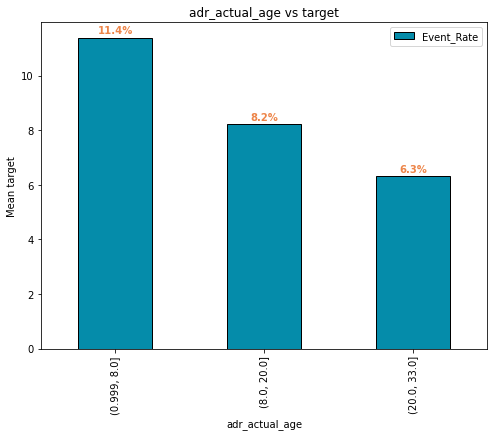

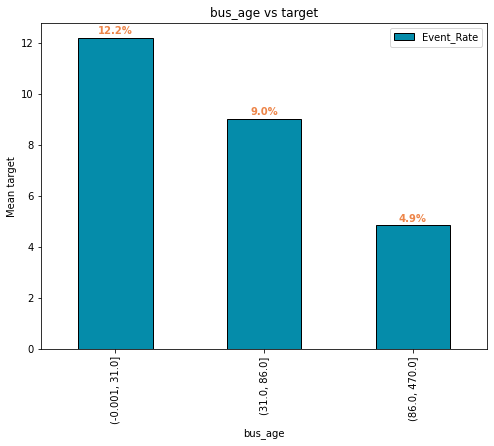

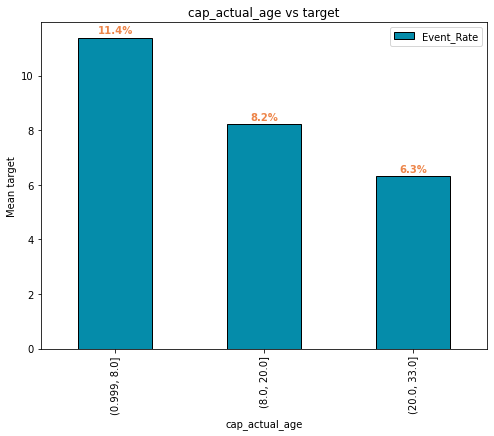

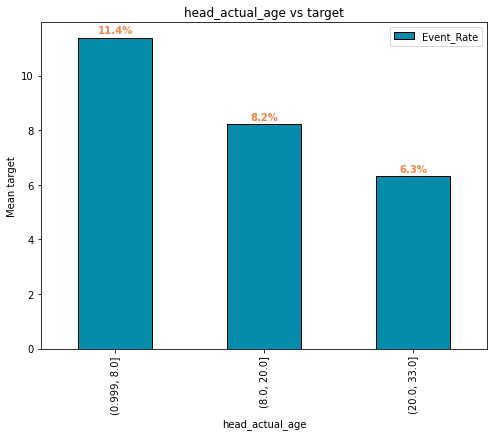

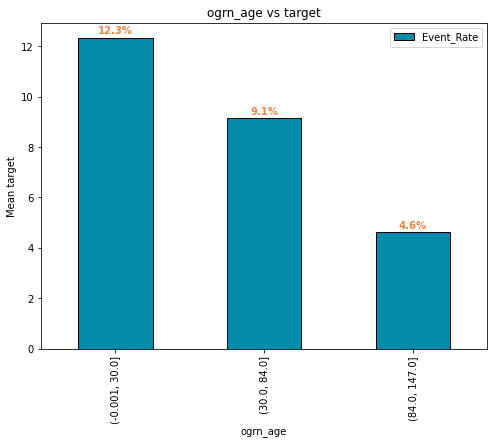

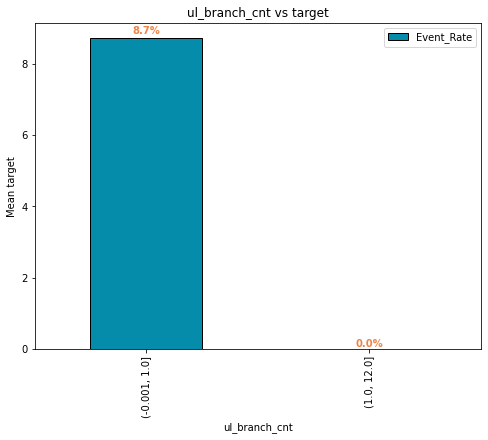

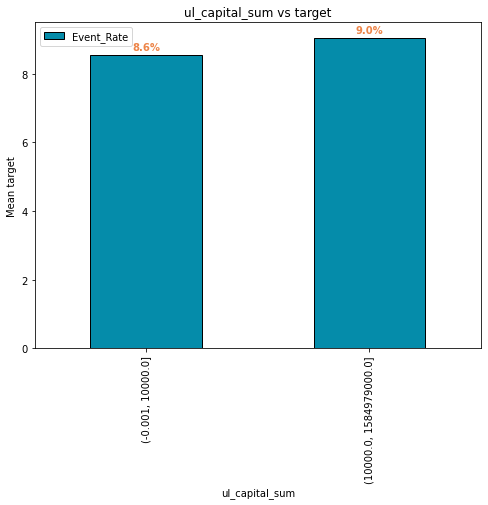

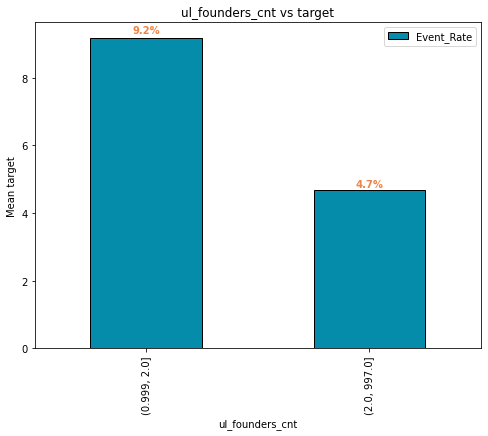

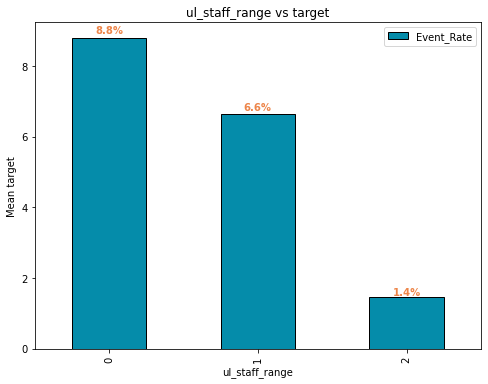

BarCharts(bar_type='v')

In [ ]:
%matplotlib inline
woe_df = clf_without.woe_df
from xverse.graph import BarCharts
clf_bars = BarCharts(bar_type='v')
clf_bars.plot(woe_df)

Проводим WOE-трансформацию, а также отбрасываем признаки с низкой информационной ценностью

In [ ]:
#woe-трансформация
X_train = clf_without.transform(X_without[X_train_without.columns])#общий обучающий сет для первой модели
X_train_without = clf_without.transform(X_train_without)
X_test_without = clf_without.transform(X_test_without)
#отброс признаков по инф. ценности
X_train_without = X_train_without.drop(['ul_capital_sum', 'ul_branch_cnt'], axis=1)
X_test_without = X_test_without.drop(['ul_capital_sum', 'ul_branch_cnt'], axis=1) 

Отбор некорреляционных признаков

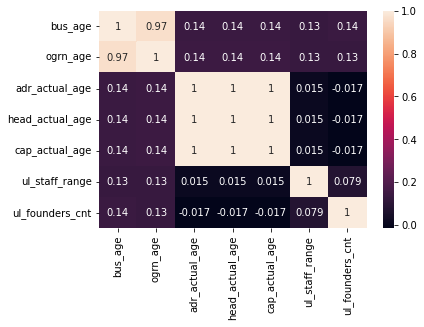

In [ ]:
sns.heatmap(X_train_without.corr(), annot=True)

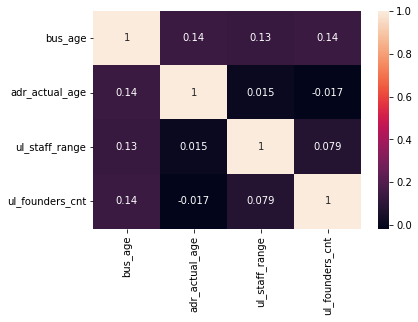

In [ ]:
feat_not_corr = ['bus_age', 'adr_actual_age', 'ul_staff_range', 'ul_founders_cnt']
sns.heatmap(X_train_without[feat_not_corr].corr(), annot=True)

In [ ]:
#оценим Gini для каждой из некоррелирующих фичей
from sklearn.metrics import roc_auc_score
gini_feats = pd.DataFrame(index=feat_not_corr, columns = ['gini'])
for feat in feat_not_corr:
    logreg = LogisticRegression(random_state = 42, penalty = 'l2', C = 1)
    logreg.fit(X_train_without.loc[:, feat].values.reshape(-1,1), y_train_without)
    preds_train = logreg.predict_proba(X_train_without.loc[:, feat].values.reshape(-1,1))[:, 1]
    gini_feats.loc[feat, 'gini'] = 2*roc_auc_score(y_train_without, preds_train) - 1

In [ ]:
gini_feats

,gini
bus_age,0.204439
adr_actual_age,0.143578
ul_staff_range,0.010846
ul_founders_cnt,0.053189


In [ ]:
X_train = X_train[feat_not_corr]#общий обучающий датасет для модели 1
X_train_without = X_train_without[feat_not_corr]
X_test_without = X_test_without[feat_not_corr]

In [ ]:
#подбор коэффициента регуляризации:
from sklearn.model_selection import StratifiedKFold
cv_scores_train = []
cv_scores_test = []
alphas = np.arange(0.1, 4, 0.2)
kfold = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 42)
for alpha in alphas:
    scores_one_alpha_train = []
    scores_one_alpha_test = []
    coeff = []
    for train_index, test_index in kfold.split(X_train_without, y_train_without):
        X_train, X_test = X_train_without.iloc[train_index,:], X_train_without.iloc[test_index,:]
        y_train, y_test = y_train_without.iloc[train_index], y_train_without.iloc[test_index]
        logreg = LogisticRegression(random_state = 42, penalty = 'l2', C = alpha)
        logreg.fit(X_train, y_train)
        pred_train = logreg.predict_proba(X_train)[:, 1]
        pred_test = logreg.predict_proba(X_test)[:, 1]
        scores_one_alpha_train.append(roc_auc_score(y_train, pred_train))
        scores_one_alpha_test.append(roc_auc_score(y_test, pred_test))
        coeff.append(logreg.coef_)
    mean_coeff = np.mean(coeff, axis = 0)
    cv_scores_train.append(np.mean(scores_one_alpha_train))
    cv_scores_test.append(np.mean(scores_one_alpha_test))
print('Коэффициент (лучший):',alphas[np.argmax(cv_scores_test)])

Коэффициент (лучший): 0.1


In [ ]:
X_test_without.dtypes#выяснилось, что в ul_founders_cnt и bus_age тестовой подвыборки содержится NA

bus_age             object
adr_actual_age     float64
ul_staff_range     float64
ul_founders_cnt     object
dtype: object

In [ ]:
print(X_test_without.loc[X_test_without['ul_founders_cnt'] == 'NA'].index, '\n', \
      X_test_without.loc[X_test_without['bus_age'] == 'NA'].index)#индексы объектов NA?

Int64Index([31233], dtype='int64') 
 Int64Index([18419], dtype='int64')


In [ ]:
X_test_without = X_test_without.drop([31233, 18419], axis=0)#отбрасываем NA объекты
y_test_without = y_test_without.drop([31233, 18419], axis=0)
X_test_without['ul_founders_cnt'] = X_test_without['ul_founders_cnt'].astype(float)
X_test_without['bus_age'] = X_test_without['ul_founders_cnt'].astype(float)

In [ ]:
X_test_without.dtypes

bus_age            float64
adr_actual_age     float64
ul_staff_range     float64
ul_founders_cnt    float64
dtype: object

In [ ]:
#model
logreg_without = LogisticRegression(random_state = 42, penalty = 'l2', C = 0.1)
logreg_without.fit(X_train_without, y_train_without)
y_pred = logreg_without.predict_proba(X_test_without)[:,1]
y_pred_train = logreg_without.predict_proba(X_train_without)[:,1]
print("ROC AUC train:", roc_auc_score(y_train_without, y_pred_train))
print("ROC AUC val:", roc_auc_score(y_test_without, y_pred))

ROC AUC train: 0.6294166752306165
ROC AUC val: 0.586924009179753


In [ ]:
X_train.dtypes

bus_age             object
adr_actual_age     float64
ul_staff_range     float64
ul_founders_cnt     object
dtype: object

In [ ]:
#в общем датасете NA объекты также следует удалить
X_train = X_train.drop([31233, 18419], axis=0)
y_without = y_without.drop([31233, 18419], axis=0)
X_train['ul_founders_cnt'] = X_train['ul_founders_cnt'].astype(float)
X_train['bus_age'] = X_train['ul_founders_cnt'].astype(float)

In [ ]:
logreg_without_final = LogisticRegression(random_state = 42, penalty = 'l2', C = 0.1)
logreg_without_final.fit(X_train, y_without)

LogisticRegression(C=0.1, random_state=42)

##Модель для данных c [ar_revenue, ..., ab_other_borrowings]

In [ ]:
#аналогичные действия
X_with = train_df_with.drop('default_12m', axis=1)
y_with = train_df_with['default_12m']

In [ ]:
X_train_with, X_test_with, y_train_with, y_test_with = \
train_test_split(X_with, y_with, test_size=0.3, random_state=42)

In [ ]:
clf_with = WOE()
clf_with.fit(X_train_with, y_train_with)
clf_with.woe_df
print(clf_with.iv_df)#IV - датасет

                   Variable_Name  Information_Value
11                ab_own_capital           0.391778
16                 ar_net_profit           0.338249
18          ar_profit_before_tax           0.326942
7                      ab_losses           0.324245
21                ar_sale_profit           0.257635
3         ab_cash_and_securities           0.250612
23                      ar_taxes           0.180472
19                    ar_revenue           0.178855
24             ar_total_expenses           0.166645
25                       bus_age           0.166529
20                  ar_sale_cost           0.166476
28                      ogrn_age           0.161401
8       ab_mobile_current_assets           0.157829
5                   ab_inventory           0.149582
32                ul_staff_range           0.116254
31               ul_founders_cnt           0.113063
2            ab_borrowed_capital           0.085853
0            ab_accounts_payable           0.063697
4          a

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


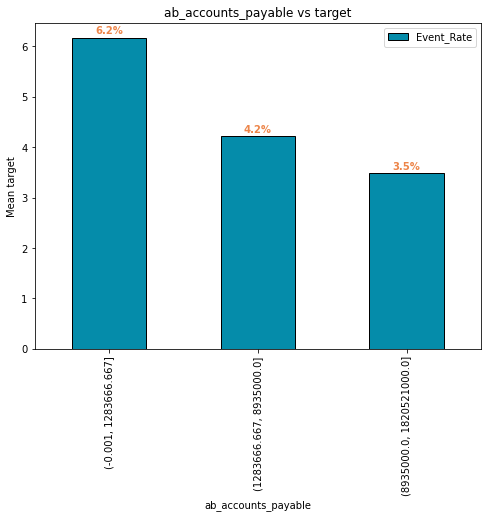

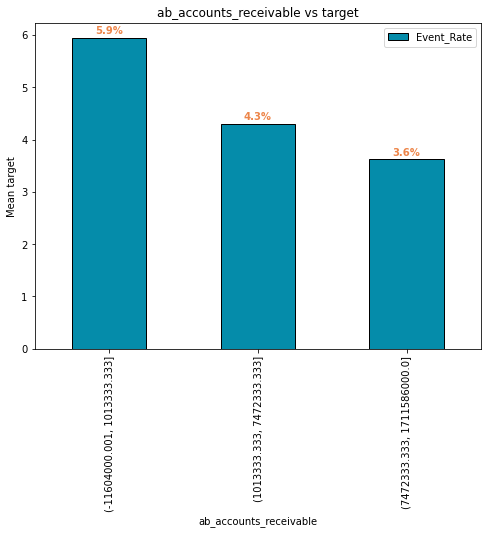

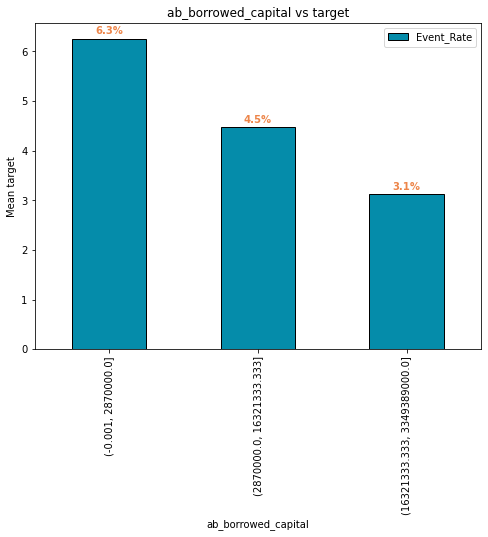

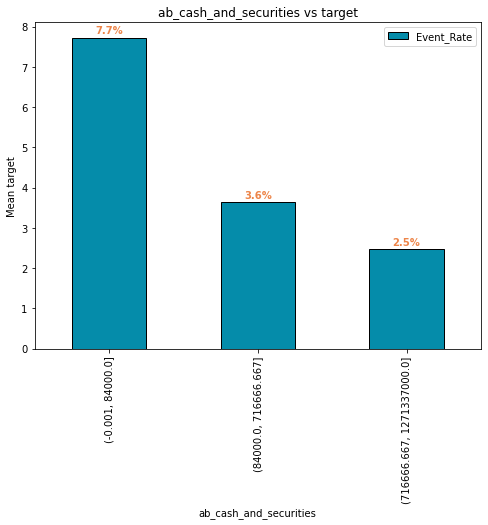

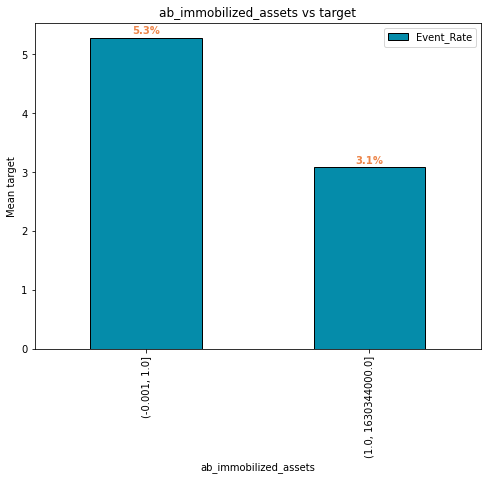

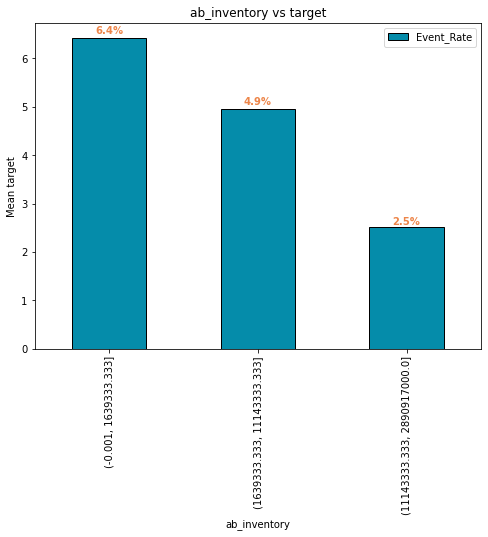

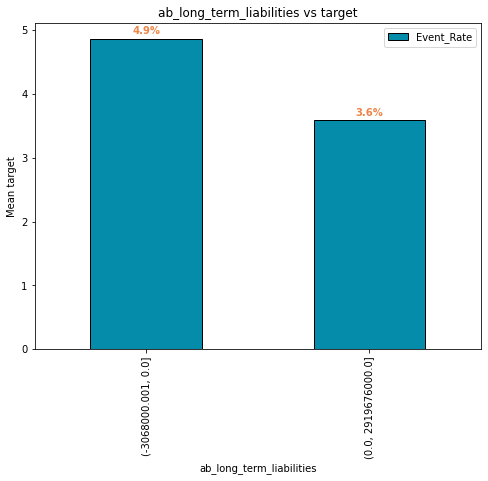

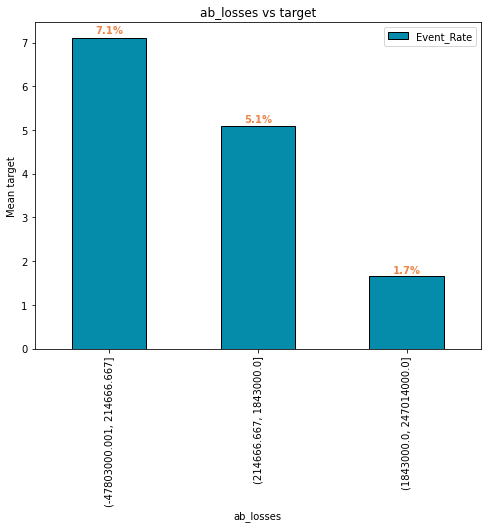

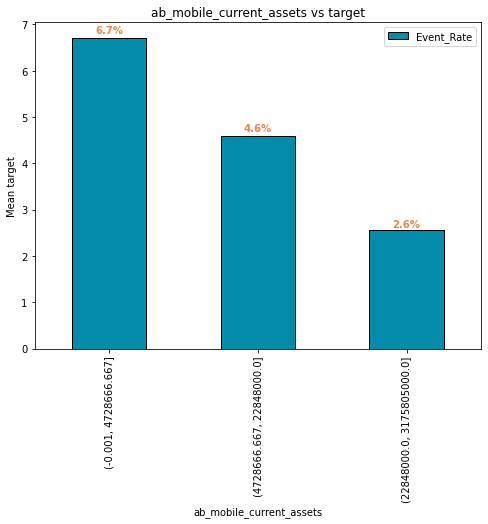

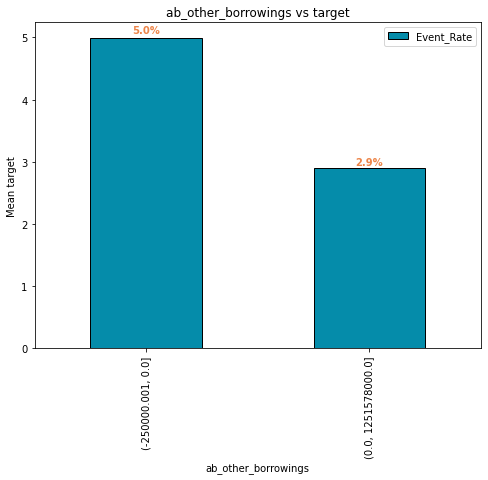

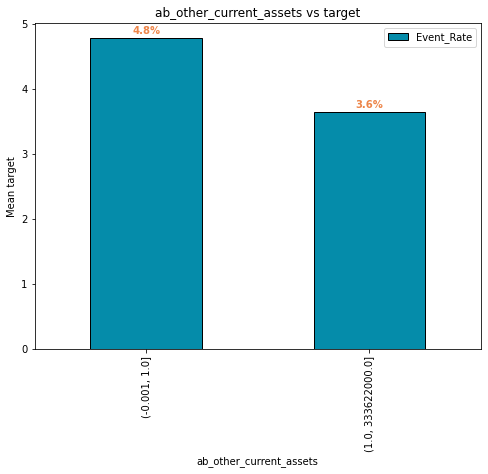

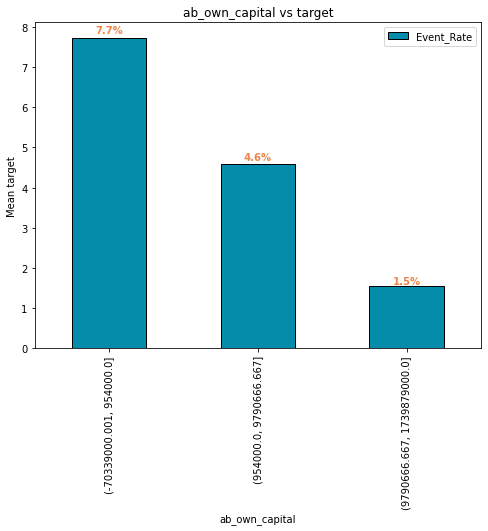

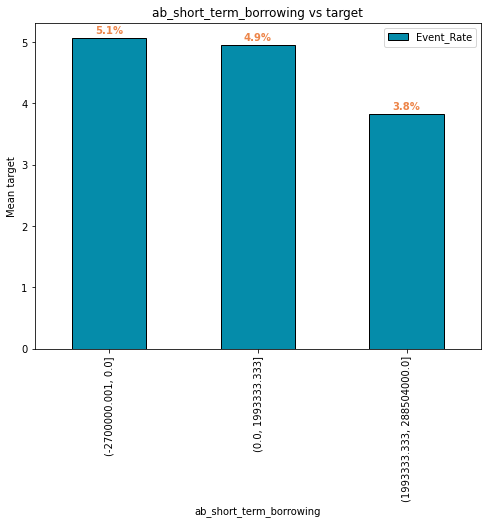

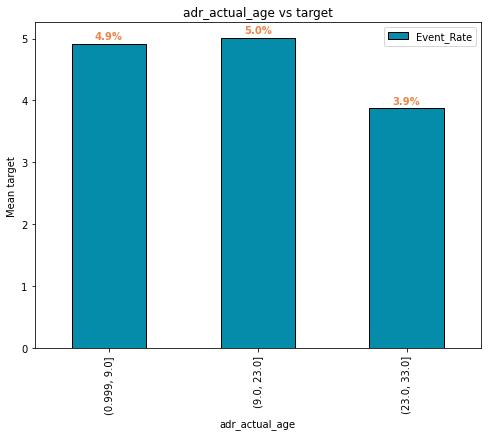

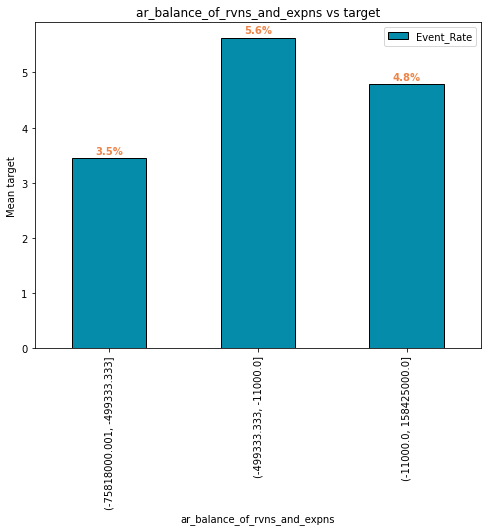

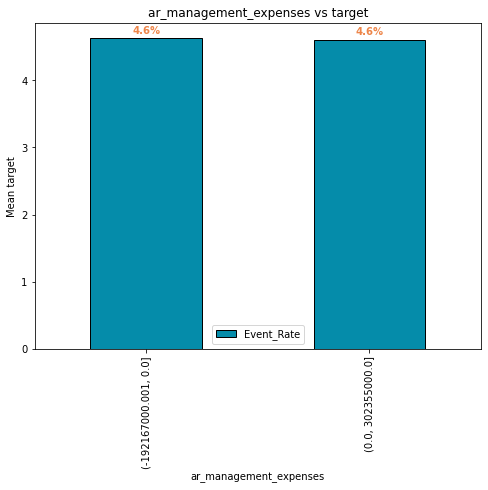

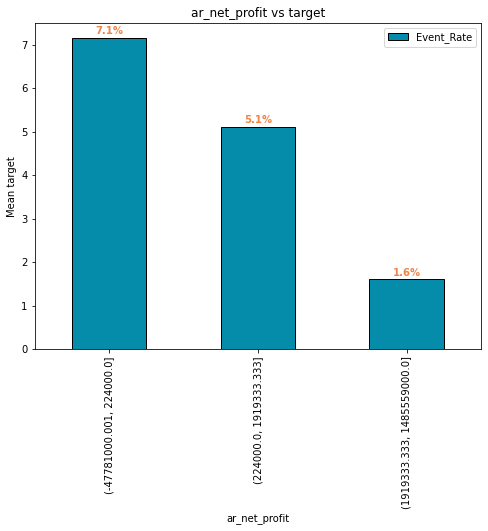

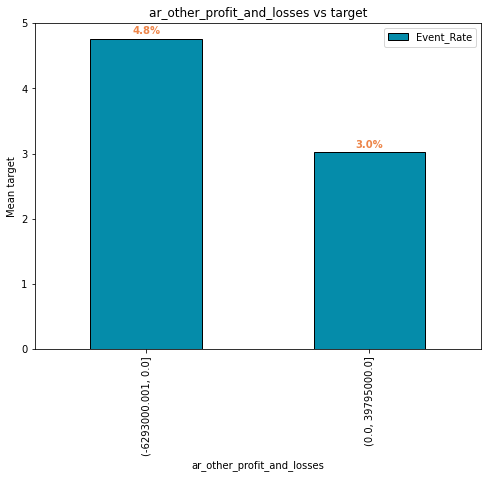

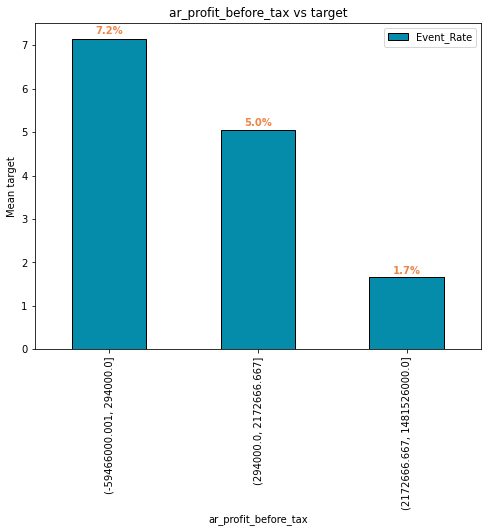

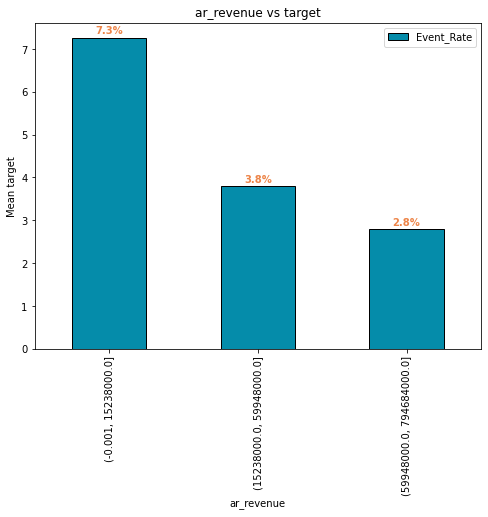

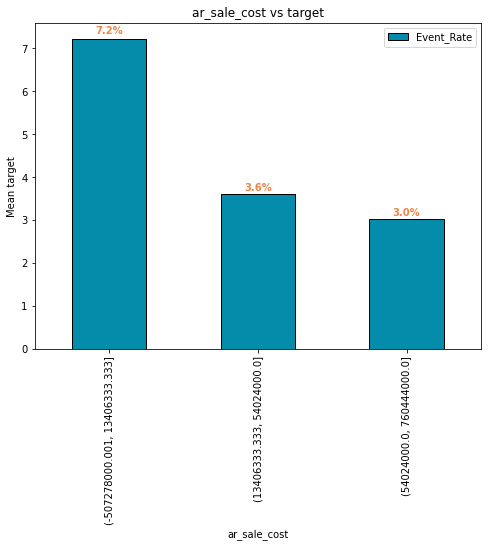

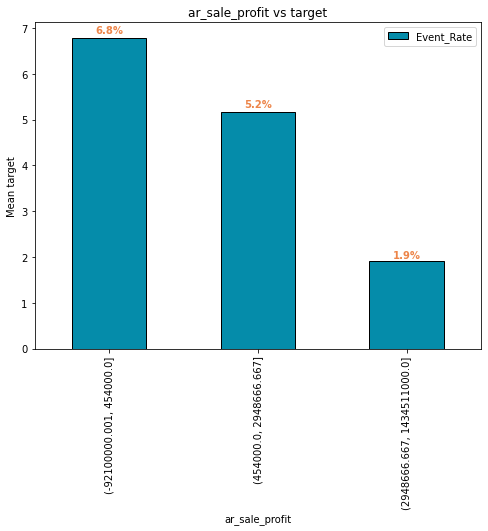

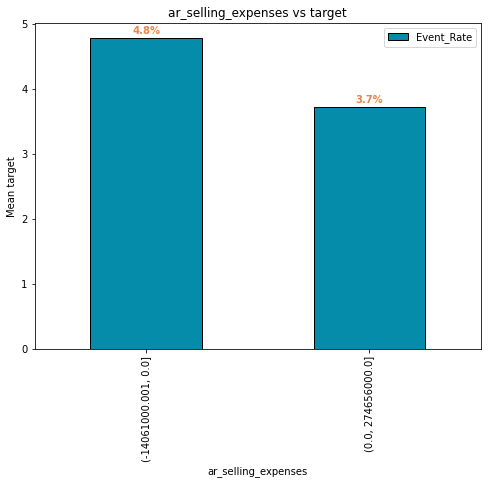

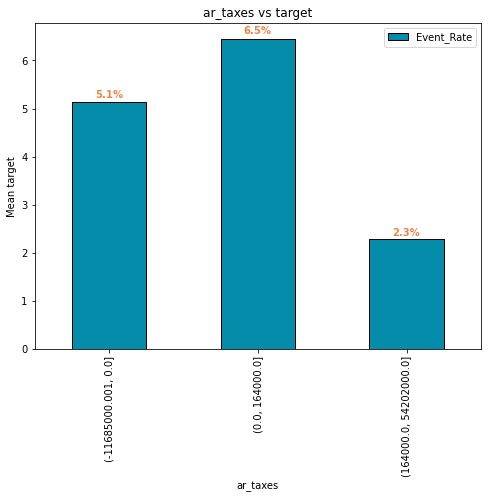

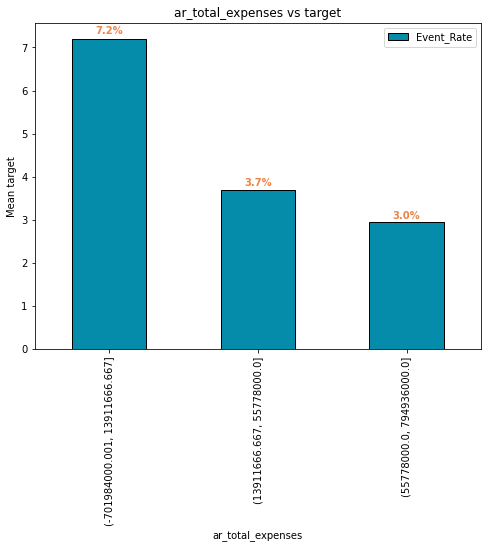

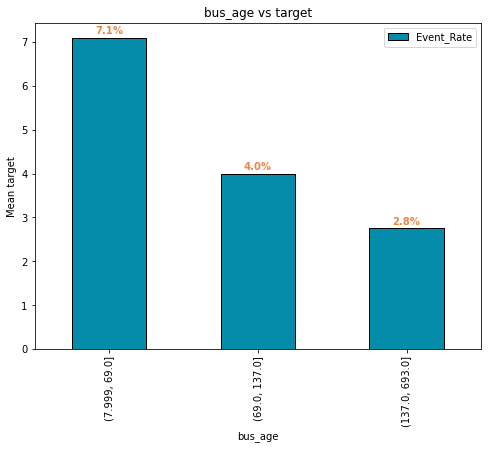

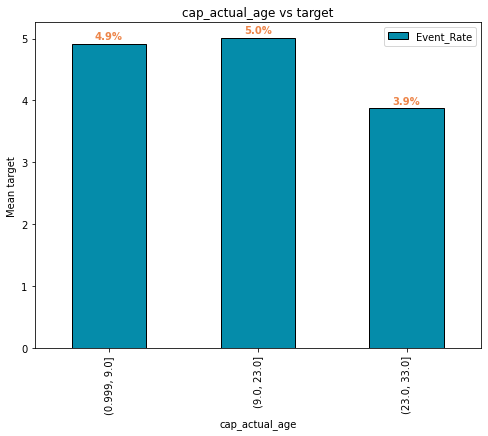

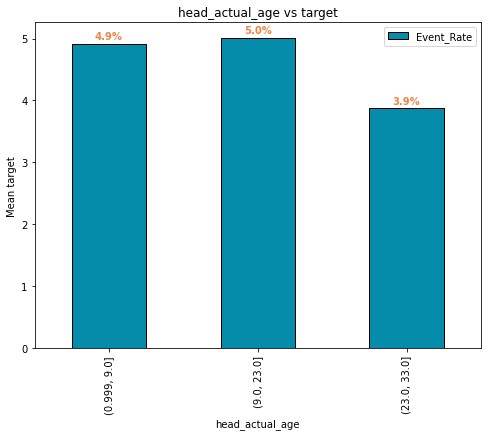

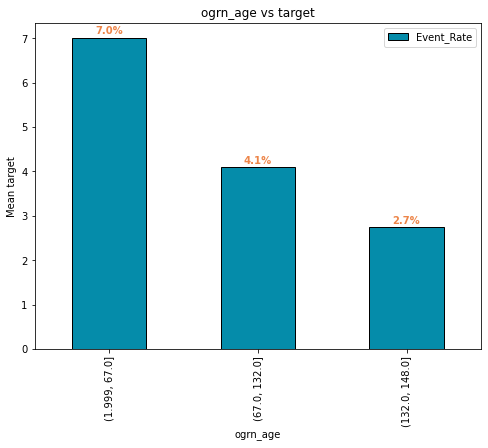

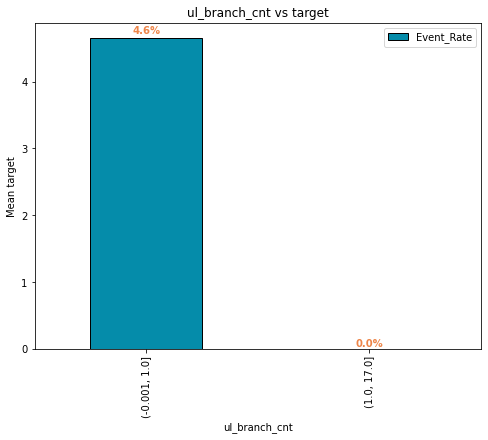

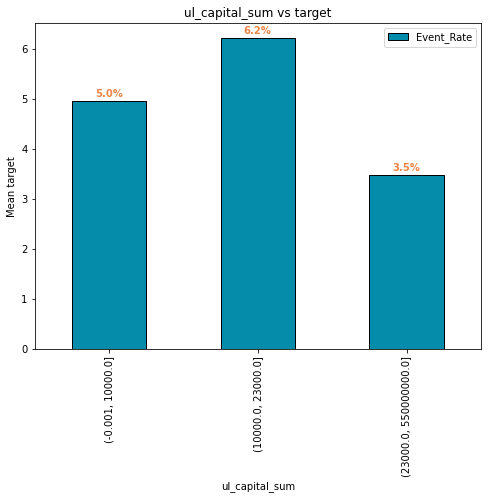

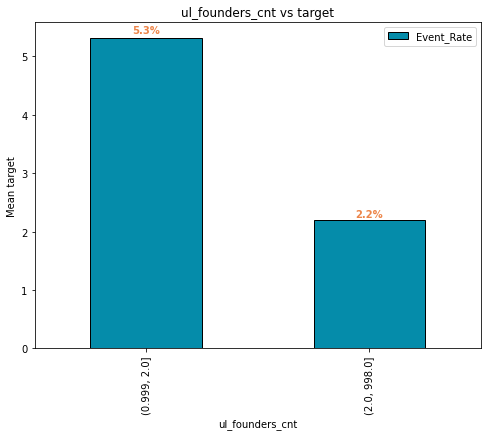

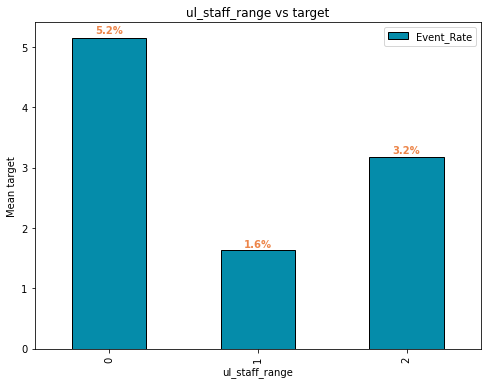

BarCharts(bar_type='v')

In [ ]:
%matplotlib inline
woe_df = clf_with.woe_df
clf_bars = BarCharts(bar_type='v')
clf_bars.plot(woe_df)

In [ ]:
dropable_feats = ['ab_accounts_receivable', 'ar_balance_of_rvns_and_expns', 'ul_capital_sum', 'ab_other_borrowings', 'ab_short_term_borrowing',\
                  'ab_long_term_liabilities', 'ar_other_profit_and_losses', 'cap_actual_age', 'head_actual_age', 'adr_actual_age',\
                  'ab_other_current_assets', 'ar_selling_expenses', 'ul_branch_cnt', 'ar_management_expenses']

In [ ]:
#woe-трансформация
X_train1 = clf_with.transform(X_with[X_train_with.columns])
X_train_with = clf_with.transform(X_train_with)
X_test_with = clf_with.transform(X_test_with)
#отброс признаков по инф. ценности
X_train_with = X_train_with.drop(dropable_feats, axis=1)
X_test_with = X_test_with.drop(dropable_feats, axis=1) 

Отбор некорреляционных признаков

In [ ]:
X_train_with.corr()

,ar_revenue,ar_total_expenses,ar_sale_cost,ar_sale_profit,ar_profit_before_tax,ar_taxes,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_accounts_payable,bus_age,ogrn_age,ul_staff_range,ul_founders_cnt
ar_revenue,1.000000,0.958902,0.942273,0.548889,0.506971,0.474300,0.482793,0.252121,0.713096,0.589173,0.453273,0.474671,0.508395,0.686389,0.661553,0.249527,0.239284,0.362067,0.164542
ar_total_expenses,0.958902,1.000000,0.976638,0.489465,0.456685,0.450207,0.432211,0.235955,0.687667,0.567116,0.444978,0.425977,0.473248,0.675327,0.661307,0.230469,0.221330,0.340215,0.155583
ar_sale_cost,0.942273,0.976638,1.000000,0.479748,0.450972,0.434941,0.427250,0.211514,0.671067,0.559831,0.435463,0.422280,0.470241,0.654931,0.645125,0.231250,0.222993,0.326296,0.159238
ar_sale_profit,0.548889,0.489465,0.479748,1.000000,0.781653,0.463886,0.763600,0.209927,0.548088,0.474498,0.350035,0.752112,0.596569,0.431984,0.350553,0.254498,0.242789,0.271849,0.156773
ar_profit_before_tax,0.506971,0.456685,0.450972,0.781653,1.000000,0.464946,0.951600,0.225559,0.518886,0.457687,0.338905,0.948972,0.637995,0.384548,0.312159,0.247149,0.229387,0.295879,0.205883
ar_taxes,0.474300,0.450207,0.434941,0.463886,0.464946,1.000000,0.405834,0.132527,0.404964,0.307310,0.284812,0.410516,0.373940,0.383069,0.372738,0.169829,0.167313,0.186406,0.073777
ar_net_profit,0.482793,0.432211,0.427250,0.763600,0.951600,0.405834,1.000000,0.233621,0.502004,0.454981,0.328748,0.971201,0.637603,0.365261,0.290956,0.246225,0.227261,0.298852,0.207153
ab_immobilized_assets,0.252121,0.235955,0.211514,0.209927,0.225559,0.132527,0.233621,1.000000,0.286324,0.251072,0.174796,0.208620,0.269351,0.324566,0.209923,0.169852,0.135037,0.331619,0.150213
ab_mobile_current_assets,0.713096,0.687667,0.671067,0.548088,0.518886,0.404964,0.502004,0.286324,1.000000,0.770444,0.408688,0.492554,0.629375,0.788035,0.654634,0.285242,0.270984,0.431382,0.217836
ab_inventory,0.589173,0.567116,0.559831,0.474498,0.457687,0.307310,0.454981,0.251072,0.770444,1.000000,0.325904,0.442012,0.614630,0.630542,0.511554,0.335374,0.319380,0.404921,0.271166


In [ ]:
droppable = ['ar_total_expenses', 'ar_sale_cost', 'ab_mobile_current_assets', 'ab_borrowed_capital',\
                               'ab_accounts_payable', 'ab_own_capital', 'ogrn_age', 'ab_losses', 'ar_net_profit', 'ab_inventory',\
                               'ar_profit_before_tax', 'ar_sale_profit']

In [ ]:
remained = X_train_with.columns.drop(droppable)

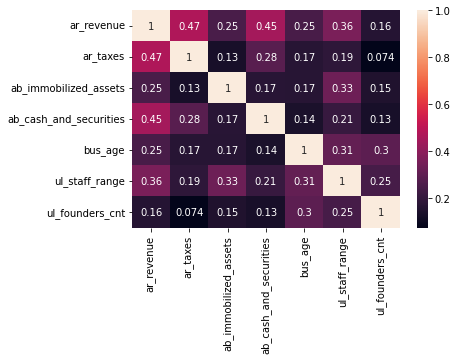

In [ ]:
sns.heatmap(X_train_with.drop(droppable, axis=1).corr(), annot=True)

In [ ]:
#from sklearn.metrics import roc_auc_score
gini_feats = pd.DataFrame(index=remained, columns = ['gini'])
for feat in remained:
    logreg = LogisticRegression(random_state = 42, penalty = 'l2', C = 1)
    logreg.fit(X_train_with.loc[:, feat].values.reshape(-1,1), y_train_with)
    preds_train = logreg.predict_proba(X_train_with.loc[:, feat].values.reshape(-1,1))[:, 1]
    gini_feats.loc[feat, 'gini'] = 2*roc_auc_score(y_train_with, preds_train) - 1

In [ ]:
gini_feats

,gini
ar_revenue,0.224151
ar_taxes,0.209308
ab_immobilized_assets,0.103727
ab_cash_and_securities,0.264346
bus_age,0.218018
ul_staff_range,0.101951
ul_founders_cnt,0.122971


In [ ]:
X_train1 = X_train1[remained]#общий датасет для второй модели
X_train_with = X_train_with[remained]
X_test_with = X_test_with[remained]

In [ ]:
#подбор коэффициента регуляризации:
#from sklearn.model_selection import StratifiedKFold
cv_scores_train = []
cv_scores_test = []
alphas = np.arange(0.1, 4, 0.2)
kfold = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 42)
for alpha in alphas:
    scores_one_alpha_train = []
    scores_one_alpha_test = []
    coeff = []
    for train_index, test_index in kfold.split(X_train_with, y_train_with):
        X_train, X_test = X_train_with.iloc[train_index,:], X_train_with.iloc[test_index,:]
        y_train, y_test = y_train_with.iloc[train_index], y_train_with.iloc[test_index]
        logreg = LogisticRegression(random_state = 42, penalty = 'l2', C = alpha)
        logreg.fit(X_train, y_train)
        pred_train = logreg.predict_proba(X_train)[:, 1]
        pred_test = logreg.predict_proba(X_test)[:, 1]
        scores_one_alpha_train.append(roc_auc_score(y_train, pred_train))
        scores_one_alpha_test.append(roc_auc_score(y_test, pred_test))
        coeff.append(logreg.coef_)
    mean_coeff = np.mean(coeff, axis = 0)
    cv_scores_train.append(np.mean(scores_one_alpha_train))
    cv_scores_test.append(np.mean(scores_one_alpha_test))
print('Коэффициент (лучший):',alphas[np.argmax(cv_scores_test)])

Коэффициент (лучший): 0.1


In [ ]:
X_test_with.dtypes#выяснилось, что в ar_taxes есть NA

ar_revenue                float64
ar_taxes                   object
ab_immobilized_assets     float64
ab_cash_and_securities    float64
bus_age                   float64
ul_staff_range            float64
ul_founders_cnt           float64
dtype: object

In [ ]:
X_test_with.ar_taxes.value_counts()

0.11073761938774593    1738
0.3533413047065614     1721
-0.7263672764997696    1714
NA                        2
Name: ar_taxes, dtype: int64

In [ ]:
print(X_test_with.loc[X_test_with['ar_taxes'] == 'NA'].index)

Int64Index([23666, 17941], dtype='int64')


In [ ]:
X_test_with = X_test_with.drop([23666, 17941], axis=0)
y_test_with = y_test_with.drop([23666, 17941], axis=0)
X_test_with['ar_taxes'] = X_test_with['ar_taxes'].astype(float)

In [ ]:
X_test_with.dtypes

ar_revenue                float64
ar_taxes                  float64
ab_immobilized_assets     float64
ab_cash_and_securities    float64
bus_age                   float64
ul_staff_range            float64
ul_founders_cnt           float64
dtype: object

In [ ]:
#model
logreg_with = LogisticRegression(random_state = 42, penalty = 'l2', C = 0.1)
logreg_with.fit(X_train_with, y_train_with)
y_pred = logreg_with.predict_proba(X_test_with)[:,1]
y_pred_train = logreg_with.predict_proba(X_train_with)[:,1]
print("ROC AUC train:", roc_auc_score(y_train_with, y_pred_train))
print("ROC AUC val:", roc_auc_score(y_test_with, y_pred))

ROC AUC train: 0.692812059343162
ROC AUC val: 0.6638889598392548


In [ ]:
X_train1.dtypes

ar_revenue                float64
ar_taxes                   object
ab_immobilized_assets     float64
ab_cash_and_securities    float64
bus_age                   float64
ul_staff_range            float64
ul_founders_cnt           float64
dtype: object

In [ ]:
#в общем датасете NA объекты также следует удалить
X_train1 = X_train1.drop([23666, 17941], axis=0)
y_with = y_with.drop([23666, 17941], axis=0)
X_train1['ar_taxes'] = X_train1['ar_taxes'].astype(float)

In [ ]:
X_train1.dtypes

ar_revenue                float64
ar_taxes                  float64
ab_immobilized_assets     float64
ab_cash_and_securities    float64
bus_age                   float64
ul_staff_range            float64
ul_founders_cnt           float64
dtype: object

In [ ]:
logreg_with_final = LogisticRegression(random_state = 42, penalty = 'l2', C = 0.1)
logreg_with_final.fit(X_train1, y_with)

LogisticRegression(C=0.1, random_state=42)

##Подготовка файла ответа

In [ ]:
record_id_without = test_df_without['record_id']
record_id_with = test_df_with['record_id']
test_df_without = test_df_without.drop(['record_id'], axis=1)
test_df_with = test_df_with.drop(['record_id'], axis=1)

In [ ]:
feat_without_woe = ['ogrn_age', 'bus_age', 'adr_actual_age', 'cap_actual_age', \
                    'head_actual_age', 'ul_founders_cnt', 'ul_staff_range', 'ul_capital_sum', 'ul_branch_cnt']
feat_with_woe = ['ab_own_capital', 'ar_net_profit', 'ar_profit_before_tax', 'ab_losses', 'ar_sale_profit', 'ab_cash_and_securities',
'ar_taxes', 'ar_revenue', 'ar_total_expenses', 'bus_age', 'ar_sale_cost', 'ogrn_age', 'ab_mobile_current_assets', 'ab_inventory',
'ul_staff_range', 'ul_founders_cnt', 'ab_borrowed_capital', 'ab_accounts_payable', 'ab_immobilized_assets', 'ab_accounts_receivable',
'ar_balance_of_rvns_and_expns', 'ul_capital_sum', 'ab_other_borrowings', 'ab_short_term_borrowing', 'ab_long_term_liabilities',
'ar_other_profit_and_losses', 'cap_actual_age', 'head_actual_age', 'adr_actual_age', 'ab_other_current_assets', 'ar_selling_expenses',
'ul_branch_cnt', 'ar_management_expenses']

In [ ]:
#woe-трансформация тестовых данных
test_df_without = clf_without.transform(test_df_without[feat_without_woe])
test_df_with = clf_with.transform(test_df_with[feat_with_woe])

In [ ]:
test_df_without = test_df_without[X_train_without.columns]
test_df_with = test_df_with[X_train_with.columns]

In [ ]:
threshold_without = y_without.mean()

In [ ]:
threshold_with = y_with.mean()

In [ ]:
#формирование ответа
predicted_without = (logreg_without_final.predict_proba(test_df_without)[:,1]>threshold_without).astype(int)
predicted_with = (logreg_with_final.predict_proba(test_df_with)[:,1]>threshold_with).astype(int)

In [ ]:
answer_without = dict(zip(record_id_without, predicted_without))
answer_with = dict(zip(record_id_with, predicted_with))
answer_dict = answer_without.copy()
answer_dict.update(answer_with)

In [ ]:
answ_df = test_df[['record_id']]
answ_df['predict'] = answ_df['record_id']
answ_df['predict'] = answ_df['predict'].map(answer_dict)
answ_df = answ_df.rename(columns = {'record_id': 'id'})

In [ ]:
answ_df.to_csv('answer.csv',index=False, sep=';')

😢


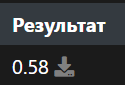